[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243]


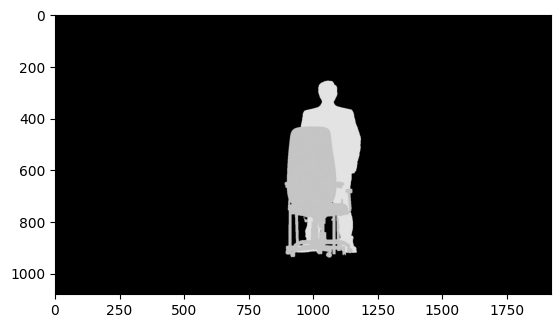

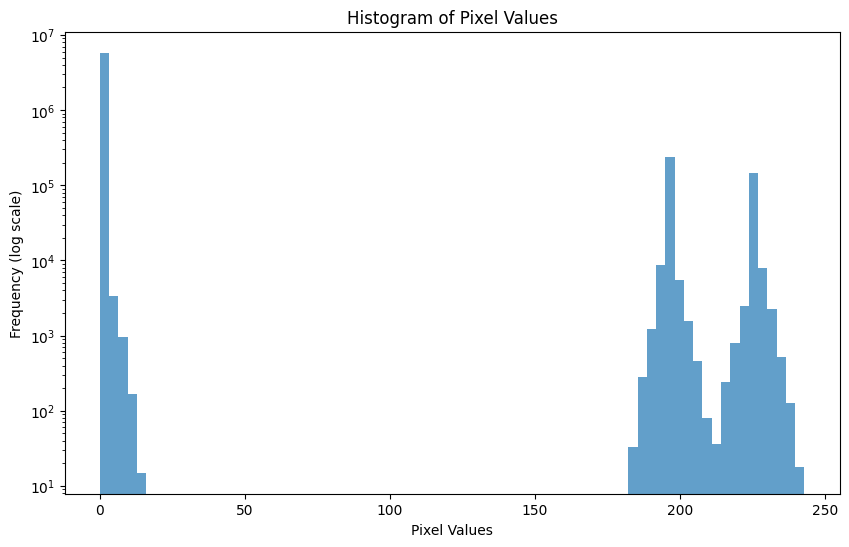

In [8]:
from PIL import Image
import numpy as np

imgPath = "E:\\datasets\\eirt_output\\mask\\Image0000.jpg"

# Load image
img = Image.open(imgPath)

# Convert to NumPy array
arr = np.array(img)

# Get unique pixel values
unique_vals = np.unique(arr)

print(unique_vals)

import cv2
img = cv2.imread(imgPath)
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(arr.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()

In [ ]:
imgPath = "E:\\datasets\\eirt_output\\mask\\Image0000.jpg"

with open(imgPath, 'rb') as f:
    img_data = f.read()
    


